**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [ ]:
import pandas as pd
data = pd.read_csv('web_sites_data.csv')

data.head()

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


#### Data processing

In [2]:
import nltk
import string
import re
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
from bs4 import BeautifulSoup
import html
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd


def clear_data(data):
    stop_words = stopwords.words("english")

    data_list = [i.lower() for i in data['text']]
    pre_data = data_list.copy()

    for i in tqdm(range(len(data_list))):
        
        temp = BeautifulSoup(html.unescape(pre_data[i]), 'html.parser').text #Remove html-tags
        pre_data[i] = re.sub(r'\n+', '\n', temp)
        pre_data[i] = re.sub(r'https?://\S+|www\.\S+', '', pre_data[i])
        pre_data[i] = re.sub("[^a-zA-Z ]+", " ", pre_data[i]) # Remove non-english words
        pre_data[i] = re.sub(r"[^\w\s]", "", pre_data[i], re.UNICODE)
        pre_data[i] = WhitespaceTokenizer().tokenize(pre_data[i])
        pre_data[i] = [token for token in pre_data[i] if token not in stop_words and len(token)>3] #Remove stop-words
        pre_data[i] = [WordNetLemmatizer().lemmatize(token) for token in pre_data[i]]
    return(pre_data)

from collections import Counter

def freq_words(pre_data):
    counter = Counter()

    for words in pre_data:
        counter.update(Counter(words))

    top = counter.most_common(100)
    return pd.DataFrame(top, columns=['word', 'freq'])


In [ ]:
pre_data = clear_data(data)

100%|██████████| 71699/71699 [31:58<00:00, 37.36it/s]  


In [ ]:
for i in tqdm(range(len(pre_data))):
    with open('predata.txt', 'a') as file:
        file.write(' '.join(pre_data[i]) + '\n')

100%|██████████| 71699/71699 [00:03<00:00, 18437.26it/s]


In [ ]:
# pre_data = []
# with open('predata.txt', 'r') as file:
#     for line in file:
#         pre_data.append(line.split())

#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [ ]:

df_top = freq_words(pre_data)
df_top.head()

,word,freq
0,game,625901
1,xbox,381511
2,review,249977
3,news,223887
4,player,188851


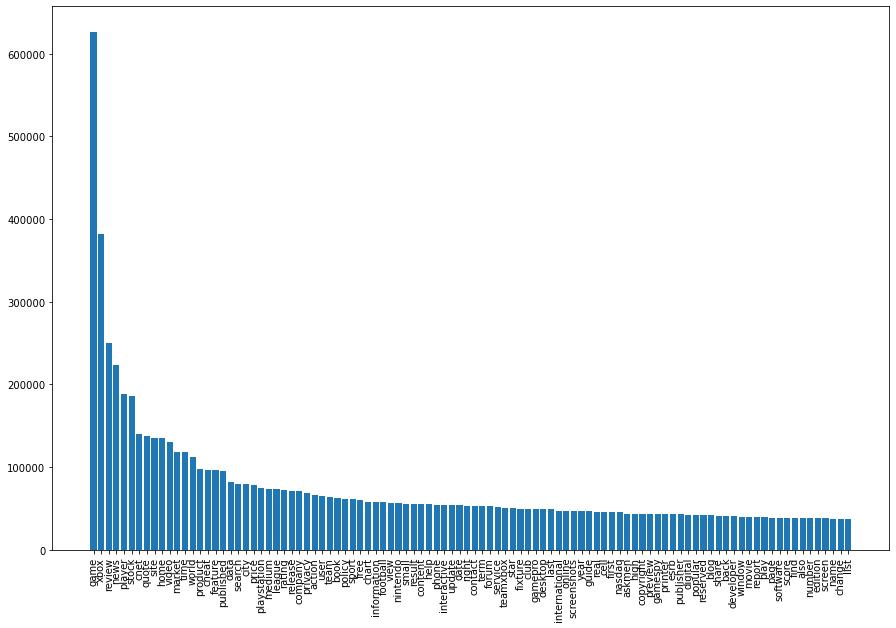

In [ ]:

plt.figure(figsize=(15,10))
plt.bar(df_top['word'],df_top['freq'])
plt.xticks(rotation=90)

plt.show()


#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [ ]:
data['text'][0][:1000]

'<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.png">\n<title>Eric Newby : Love and War in the Apennines</title>\n<meta http-equiv="Content-Type" content="text/html">\n\t\n</head>\n<body bgcolor="#FFFFFF" leftmargin="0" topmargin="0" marginwidth="0" marginheight="0" text="#000000" link="#0000FF" vlink="#0000FF" alink="#FF0000" >\n<basefont face="arial, sans-serif"><font face="arial, sans-serif">\n<table width="100%" height="70" border="0" cellpadding="0" cellspacing="0">\n\t<tr><form action="/search" method="get">\n\t\t<td width="283" colspan="2" rowspan="2" bgcolor="#689A9B">\n\t\t\t<a href="/">\n\t\t\t\t<img src="http://i.bookmooch.com/images/bookmooch_logo.gif" width="283" height="66" border="0" alt="BookMooch logo"></a></td>\n\t\t<td width="675" height="38" colspan="9" align="right" bgcolor="#689A9B" xcolor="#689A9B">\n\t\t\n<tab

In [ ]:
' '.join(pre_data[0][:1000])

'eric newby love apennines eric newby love apennines author eric newby title love apennines moochable copy copy available amazon suggests short walk hindu kushslowly gangeson shore mediterraneanthe last grain raceround ireland gear recommended bookmooch bookmooch bookmark show recommendation topic abridgedancientasiaaudiobooksbiographies memoirsbiographies memoir generalbooks cassetteeastern frontedition format europeflorencehiroshima nagasakihistoryhistory europe generalhistory europe italy generalhome frontintelligence operationsitalyiwo jimamedievalmilanmilitarynaplesnavalnormandypearl harborpersonal narrativesreferencerefinementsrenaissanceromesardiniasicilystalingradtraveltravel europe italy generaltuscanyumbriavenicewestern frontwomenworld iiwriting published english binding audio cassette page date isbn publisher harpercollins audio weight pound size inch edition abridged amazon price previous giver jessierey previous moocher wishlists description book description italy made pea

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [ ]:
def shringl(s, l = 5):
    return [s[i:i+l] for i in range(len(s))][:-l]

In [ ]:
from datasketch import MinHash, MinHashLSH

def lsh_similar(minhashes,num_perm):
    lsh = MinHashLSH(num_perm=num_perm)
    for i, mh in enumerate(tqdm(minhashes)):
        # Check if duplicate of already seen item
        for j in lsh.query(mh):
            yield (j, i)
        # Add to the seen items
        lsh.insert(i, mh)

shr_sizes = [5,10,15,20,25]
num_perm = 50
duplicates = []
for shr_size in shr_sizes:
    minhashes = []
    for s in pre_data: 
        s = ' '.join(s) 
        shr = shringl(s,shr_size)
        m = MinHash(num_perm=num_perm)
        for d in shr:
            m.update(d.encode('utf8'))
        minhashes.append(m)
    similar_all = list(lsh_similar(minhashes,num_perm))
    duplicates.append(len(similar_all))


plt.bar(shr_sizes,duplicates)
plt.ylabel('Number of duplicates')
plt.xlabel('Shringle size')

In [ ]:
shr_size = 10
num_perms = [50,100,150,200,250]
duplicates = []
for num_perm in num_perms:
    minhashes = []
    for s in pre_data: 
        s = ' '.join(s) 
        shr = shringl(s,shr_size)
        m = MinHash(num_perm=num_perm)
        for d in shr:
            m.update(d.encode('utf8'))
        minhashes.append(m)
    similar_all = list(lsh_similar(minhashes,num_perm))
    duplicates.append(len(similar_all))


plt.bar(num_perms,duplicates)
plt.ylabel('Number of duplicates')
plt.xlabel('Minhash num_perm')

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [6]:
import os
os.getcwd()

'/content'

In [3]:
import pandas as pd
data2 = pd.read_csv('data.csv', engine='python')

data2

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data2['text'] = [' '.join(l) for l in clear_data(data2)]
data2

100%|██████████| 19579/19579 [00:07<00:00, 2746.85it/s]


,id,text,author
0,id26305,process however afforded mean ascertaining dim...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff capered hill cutting mann...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
...,...,...,...
19574,id17718,could fancied looked eminent landscape painter...,EAP
19575,id08973,lid clenched together spasm,EAP
19576,id05267,mais faut agir frenchman never faint outright,EAP
19577,id17513,item news like strike coolly received,EAP


#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [17]:
!pip install --upgrade gensim

In [18]:
import gensim

In [1]:
from gensim.models import CoherenceModel, Nmf, LdaModel 
from gensim import corpora

def q_func(model, texts, dictionary, coh):
    return CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')

def coherence(model,texts,dictionary):
    return q_func(model, texts, dictionary, 'c_v')
def norm_PMI(model,texts,dictionary):
    return q_func(model, texts, dictionary, 'c_npmi')
def distword(model,texts,dictionary):
    return q_func(model, texts, dictionary, 'u_mass')

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [5]:
from sklearn.model_selection import train_test_split

X = data2.text
y = data2.author

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Plot the histogram of resulting tokens counts in the processed datasets.

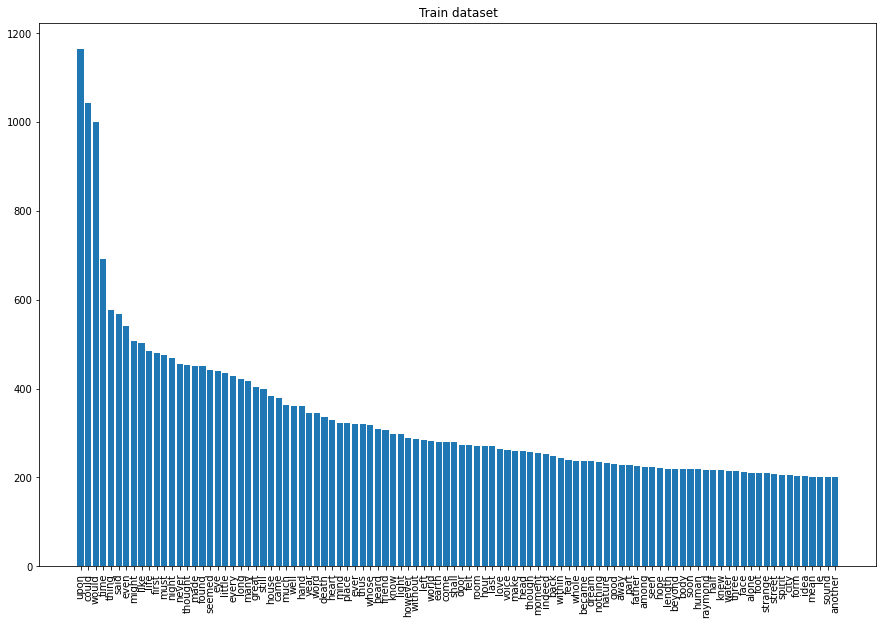

In [6]:
df_top_train = freq_words([x.split() for x in X_train])

plt.figure(figsize=(15,10))
plt.bar(df_top_train['word'],df_top_train['freq'])
plt.xticks(rotation=90)
plt.title("Train dataset")

plt.show()

Plot the histogram of resulting tokens counts in the processed datasets.

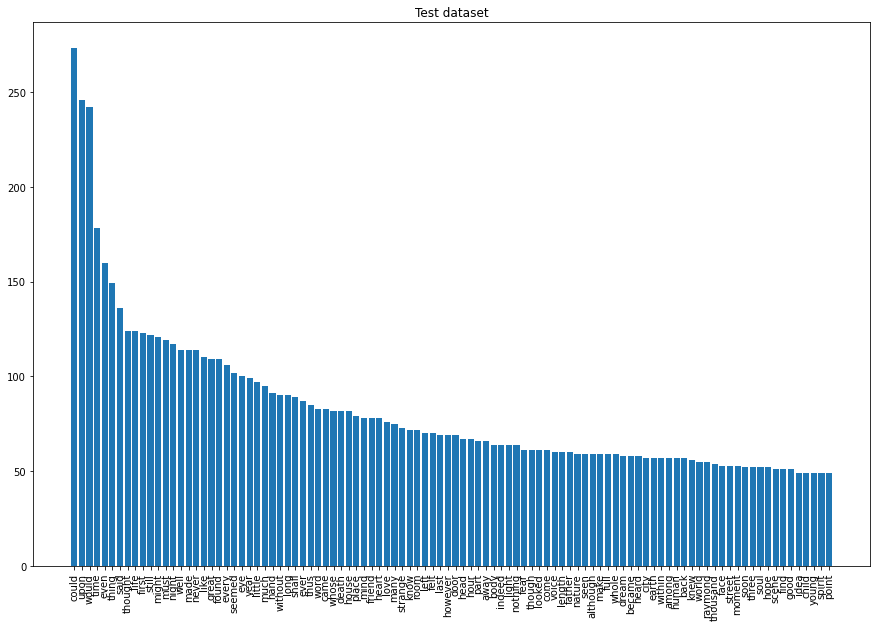

In [7]:

df_top_test = freq_words([x.split() for x in X_test])

plt.figure(figsize=(15,10))
plt.bar(df_top_test['word'],df_top_test['freq'])
plt.xticks(rotation=90)
plt.title("Test dataset")

plt.show()

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [8]:
texts = [string.split() for string in X_train]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [9]:
nmf = Nmf(corpus, id2word=dictionary, num_topics=5, random_state=42, chunksize=100)
print(*nmf.print_topics()[:3])

print('Coherence:', coherence(nmf,texts,dictionary).get_coherence())
print('Normalized PMI:', norm_PMI(nmf,texts,dictionary).get_coherence())
print('PMI:', distword(nmf,texts,dictionary).get_coherence())

(0, '0.094*"upon" + 0.006*"said" + 0.005*"little" + 0.004*"thus" + 0.004*"found" + 0.004*"hand" + 0.004*"first" + 0.004*"never" + 0.003*"head" + 0.003*"foot"') (1, '0.081*"could" + 0.006*"little" + 0.004*"room" + 0.004*"light" + 0.004*"night" + 0.004*"nothing" + 0.004*"never" + 0.004*"without" + 0.003*"face" + 0.003*"wall"') (2, '0.014*"even" + 0.011*"thing" + 0.010*"great" + 0.008*"still" + 0.007*"eye" + 0.006*"love" + 0.006*"seemed" + 0.006*"many" + 0.005*"earth" + 0.005*"world"')
Coherence: 0.3526447443170273
Normalized PMI: 0.3526447443170273
PMI: 0.3526447443170273


#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [10]:
lda = LdaModel(corpus, num_topics=5, id2word=dictionary)
print(lda.print_topics()[:3])

print('Coherence:', coherence(lda,texts,dictionary).get_coherence())
print('Normalized PMI:', norm_PMI(lda,texts,dictionary).get_coherence())
print('PMI:', distword(lda,texts,dictionary).get_coherence())

[(0, '0.008*"upon" + 0.005*"time" + 0.005*"house" + 0.005*"night" + 0.004*"long" + 0.004*"first" + 0.004*"street" + 0.003*"year" + 0.003*"found" + 0.003*"would"'), (1, '0.008*"would" + 0.006*"could" + 0.006*"said" + 0.006*"might" + 0.004*"time" + 0.004*"love" + 0.004*"even" + 0.003*"dream" + 0.003*"year" + 0.003*"nothing"'), (2, '0.007*"would" + 0.006*"upon" + 0.004*"could" + 0.003*"eye" + 0.003*"made" + 0.003*"even" + 0.003*"seemed" + 0.003*"found" + 0.003*"death" + 0.003*"word"')]
Coherence: 0.2377937212268458
Normalized PMI: 0.2377937212268458
PMI: 0.2377937212268458


### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

[Текст ссылки](https://)Write a function to convert new documents to topics probabilities vectors.

In [12]:
!pip install topicnet

     |████████████████████████████████| 104 kB 4.3 MB/s 
     |████████████████████████████████| 1.9 MB 26.3 MB/s 
     |████████████████████████████████| 137 kB 50.9 MB/s 
     |████████████████████████████████| 134 kB 45.9 MB/s 
  Created wheel for topicnet: filename=topicnet-0.8.0-py3-none-any.whl size=134578 sha256=c7d8a36a90518871792abded896e1ab9ca5d2101b515a8efff102663ab7c656d
  Stored in directory: /root/.cache/pip/wheels/f9/13/72/afb22298e81a9a190b608c6f9185ee0f7b0fe0865aed9dae09
  Created wheel for strictyaml: filename=strictyaml-1.6.1-py3-none-any.whl size=123931 sha256=89b0b1d88343938a78da34925f3765fd3ff2b2bd6a622f8289ebbf09bc4c409f
  Stored in directory: /root/.cache/pip/wheels/3e/7f/3a/d36577e71e78a8e7f89a6a263c03dd39e3f876e74d1ebb051b
Successfully built topicnet strictyaml


In [13]:
import topicnet
import artm

In [14]:
data = pd.DataFrame(pd.concat([X_train,y_train],axis=1),columns=['text','author'])
data['id'] = data.index
data.index.name = 'id'
data

,text,author,id
id,,,
5107,must spoken peculiarity hair,EAP,5107
5465,art life discovery science augmented ratio lef...,MWS,5465
15443,idris named casually frown convulsive gesture ...,MWS,15443
9737,time soon come grief famine already sapped fou...,MWS,9737
10192,great stone city lyeh monolith sepulchre sunk ...,HPL,10192
...,...,...,...
11284,letting hold upon placing foot securely wall s...,EAP,11284
11964,name john raymond legrasse profession inspecto...,HPL,11964
5390,manner wyatt received harmless pleasantry conv...,EAP,5390


In [15]:
# nltk.download()

lemmatized_text = []

for text in tqdm(data['text'].values):
    # tokens = nltk.wordpunct_tokenize(text.lower())
    lemmatized_text.append(text.split())

data['lemmatized'] = lemmatized_text
data

100%|██████████| 15663/15663 [00:00<00:00, 288880.12it/s]


,text,author,id,lemmatized
id,,,,
5107,must spoken peculiarity hair,EAP,5107,"[must, spoken, peculiarity, hair]"
5465,art life discovery science augmented ratio lef...,MWS,5465,"[art, life, discovery, science, augmented, rat..."
15443,idris named casually frown convulsive gesture ...,MWS,15443,"[idris, named, casually, frown, convulsive, ge..."
9737,time soon come grief famine already sapped fou...,MWS,9737,"[time, soon, come, grief, famine, already, sap..."
10192,great stone city lyeh monolith sepulchre sunk ...,HPL,10192,"[great, stone, city, lyeh, monolith, sepulchre..."
...,...,...,...,...
11284,letting hold upon placing foot securely wall s...,EAP,11284,"[letting, hold, upon, placing, foot, securely,..."
11964,name john raymond legrasse profession inspecto...,HPL,11964,"[name, john, raymond, legrasse, profession, in..."
5390,manner wyatt received harmless pleasantry conv...,EAP,5390,"[manner, wyatt, received, harmless, pleasantry..."


In [16]:
from nltk.collocations import (
    BigramAssocMeasures,
    BigramCollocationFinder,
)

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(data['lemmatized'])

# finder.apply_freq_filter(1)
set_dict = set(finder.nbest(bigram_measures.pmi,120000)[100:])
documents = data['lemmatized']
bigrams = []

for doc in documents:
    entry = ['_'.join([word_first, word_second])
             for word_first, word_second in zip(doc[:-1],doc[1:])
             if (word_first, word_second) in set_dict]
    bigrams.append(entry)

data['bigram'] = bigrams
data

,text,author,id,lemmatized,bigram
id,,,,,
5107,must spoken peculiarity hair,EAP,5107,"[must, spoken, peculiarity, hair]","[spoken_peculiarity, peculiarity_hair]"
5465,art life discovery science augmented ratio lef...,MWS,5465,"[art, life, discovery, science, augmented, rat...","[discovery_science, science_augmented, augment..."
15443,idris named casually frown convulsive gesture ...,MWS,15443,"[idris, named, casually, frown, convulsive, ge...","[idris_named, named_casually, casually_frown, ..."
9737,time soon come grief famine already sapped fou...,MWS,9737,"[time, soon, come, grief, famine, already, sap...","[grief_famine, famine_already, already_sapped,..."
10192,great stone city lyeh monolith sepulchre sunk ...,HPL,10192,"[great, stone, city, lyeh, monolith, sepulchre...","[city_lyeh, lyeh_monolith, monolith_sepulchre,..."
...,...,...,...,...,...
11284,letting hold upon placing foot securely wall s...,EAP,11284,"[letting, hold, upon, placing, foot, securely,...","[letting_hold, placing_foot, foot_securely, se..."
11964,name john raymond legrasse profession inspecto...,HPL,11964,"[name, john, raymond, legrasse, profession, in...","[name_john, raymond_legrasse, legrasse_profess..."
5390,manner wyatt received harmless pleasantry conv...,EAP,5390,"[manner, wyatt, received, harmless, pleasantry...","[manner_wyatt, wyatt_received, received_harmle..."


In [17]:
def vowpalize_sequence(sequence):
    word_2_frequency = Counter(sequence)

    del word_2_frequency['']

    vw_string = ''

    for word in word_2_frequency:
        vw_string += word + ":" + str(word_2_frequency[word]) + ' '

    return vw_string

In [18]:
vw_text = []

for index, d in data.iterrows():
    vw_string = ''    
    doc_id = 'data_id_'+str(d.id)
    lemmatized = '@lemmatized ' + vowpalize_sequence(d.lemmatized)
    bigram = '@bigram ' + vowpalize_sequence(d.bigram)
    author = '@author ' + d.author
    vw_string = ' |'.join([doc_id, lemmatized, bigram, author])
    vw_text.append(vw_string)

data['vw_text'] = vw_text
data = data.rename(columns={'text':'raw_text'})
data = data.astype('str')
data[['raw_text', 'vw_text']].to_csv('/content/dataset.csv')

data = data.drop(columns=['id','author','lemmatized','bigram'])
data

,raw_text,vw_text
id,,
5107,must spoken peculiarity hair,data_id_5107 |@lemmatized must:1 spoken:1 pecu...
5465,art life discovery science augmented ratio lef...,data_id_5465 |@lemmatized art:1 life:1 discove...
15443,idris named casually frown convulsive gesture ...,data_id_15443 |@lemmatized idris:2 named:1 cas...
9737,time soon come grief famine already sapped fou...,data_id_9737 |@lemmatized time:2 soon:1 come:1...
10192,great stone city lyeh monolith sepulchre sunk ...,data_id_10192 |@lemmatized great:1 stone:1 cit...
...,...,...
11284,letting hold upon placing foot securely wall s...,data_id_11284 |@lemmatized letting:1 hold:1 up...
11964,name john raymond legrasse profession inspecto...,data_id_11964 |@lemmatized name:1 john:1 raymo...
5390,manner wyatt received harmless pleasantry conv...,data_id_5390 |@lemmatized manner:1 wyatt:1 rec...


In [19]:
from topicnet.cooking_machine.model_constructor import init_simple_default_model
from topicnet.cooking_machine.dataset import Dataset

# topic_data = Dataset.from_dataframe(data,save_dataset_path='/content/')
topic_data = Dataset('/content/dataset.csv')
artm_model = init_simple_default_model(
    dataset=topic_data,
    modalities_to_use={'@lemmatized': 1.0,'@bigram':0.5, },
    main_modality='@lemmatized',
    specific_topics=5,
    background_topics=1,
)

/usr/local/lib/python3.7/dist-packages/topicnet/cooking_machine/dataset.py:220: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self._data = self._read_data(data_path)


In [20]:
print(topic_data.get_possible_modalities())

artm_model.class_ids

{'@lemmatized', '@author', '@bigram'}


{'@bigram': 0.7318464449851311, '@lemmatized': 1.0}

In [21]:
from topicnet.cooking_machine.models.topic_model import TopicModel


topic_model = TopicModel(artm_model, model_id='Groot')

In [22]:
coherence_score = artm.TopTokensScore(
                            name='TopTokensCoherenceScore',
                            class_id='@default_class',
                            num_tokens=5)
                            #topic_names=[u'topic_0',u'topic_1'],
                            #dictionary=cooc_dict)

In [24]:
topic_model.scores.add(coherence_score)

In [25]:
from topicnet.cooking_machine.experiment import Experiment

experiment = Experiment(experiment_id="exp3", save_path="experiments", topic_model=topic_model)


In [26]:
from topicnet.cooking_machine.cubes import RegularizersModifierCube


my_first_cube = RegularizersModifierCube(
    num_iter=5,
    tracked_score_function='PerplexityScore@lemmatized',
    regularizer_parameters=[
    {
        'regularizer': artm.DecorrelatorPhiRegularizer(name='decorrelation_phi',class_ids='@lemmatized'),
        'tau_grid': [0, 0.005, 0.01, 0.015, 0.02, 0.025],
    },
    {
        'regularizer': artm.SmoothSparsePhiRegularizer(name='smooth_sparse_phi',class_ids='@lemmatized'),
        'tau_grid': [-0.05, 0, 0.05],
    }
    ],
    reg_search='grid',
    verbose=True,
)

my_first_cube(topic_model, topic_data)

  0%|          | 0/18 [05:18<?, ?it/s]


[Model(id=--06h04m21s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h04m35s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h04m50s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h05m04s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h05m18s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h05m31s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h05m47s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h06m01s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h06m15s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h06m29s_31d03m2022y---, parent_id=-----------root-----------, experiment_id=exp3),
 Model(id=--06h06m43s_31d03m20

In [29]:
experiment.show()


Experiment exp3

Experiment was made with BigARTM 0.9.2
Tree:
                               ┌--06h04m21s_31d03m2022y---
                               ├--06h04m35s_31d03m2022y---
                               ├--06h04m50s_31d03m2022y---
                               ├--06h05m04s_31d03m2022y---
                               ├--06h05m18s_31d03m2022y---
                               ├--06h05m31s_31d03m2022y---
                               ├--06h05m47s_31d03m2022y---
                               ├--06h06m01s_31d03m2022y---
                               ├--06h06m15s_31d03m2022y---
-----------root-----------─────┤
                               ├--06h06m29s_31d03m2022y---
                               ├--06h06m43s_31d03m2022y---
                               ├--06h06m57s_31d03m2022y---
                               ├--06h07m10s_31d03m2022y---
                               ├--06h07m24s_31d03m2022y---
                               ├--06h07m38s_31d03m2022y---
                    

In [30]:
perplexity_criterion = 'PerplexityScore@lemmatized -> min COLLECT 1'
best_model = experiment.select(perplexity_criterion)[0]

In [31]:
from topicnet.viewers import TopTokensViewer


toptok_viewer = TopTokensViewer(best_model, num_top_tokens=5, method='phi')
toptok_viewer.view_from_jupyter()

topic_0 
 
 
 modality 
 token 
   
 
 
 
 
 @bigram 
 three_day 
 0.000510 
 
 
 several_hour 
 0.000490 
 
 
 tempest_mountain 
 0.000430 
 
 
 madame_lalande 
 0.000420 
 
 
 four_foot 
 0.000340 
 
 
 

 
 
 
   
   
 topic_0 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 would 
 0.010340 
 
 
 time 
 0.005690 
 
 
 little 
 0.005060 
 
 
 said 
 0.004880 
 
 
 could 
 0.003810 
 
 
 
 
 
 
 
   
   
 topic_1 
 
 
 modality 
 token 
   
 
 
 
 
 @bigram 
 main_compartment 
 0.000820 
 
 
 said_dupin 
 0.000640 
 
 
 twenty_four 
 0.000480 
 
 
 right_angle 
 0.000450 
 
 
 back_door 
 0.000420 
 
 
 

 
 
 
   
   
 topic_1 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 upon 
 0.007600 
 
 
 might 
 0.005130 
 
 
 friend 
 0.004910 
 
 
 house 
 0.004650 
 
 
 time 
 0.004330 
 
 
 
 
 
 
 
   
   
 topic_2 
 
 
 modality 
 token 
   
 
 
 
 
 @bigram 
 well_known 
 0.000730 
 
 
 beyond_doubt 
 0.000650 
 
 
 lord_raymond 
 0.000520 
 
 
 took_place 
 0.000480 
 
 
 five_minute 
 0.000370 
 
 
 

 
 
 
   
   
 topic_2 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 upon 
 0.007020 
 
 
 must 
 0.005440 
 
 
 first 
 0.005360 
 
 
 could 
 0.005050 
 
 
 night 
 0.004270 
 
 
 
 
 
 
 
   
   
 topic_3 
 
 
 modality 
 token 
   
 
 
 
 
 @bigram 
 never_seen 
 0.000600 
 
 
 state_room 
 0.000580 
 
 
 ourang_outang 
 0.000460 
 
 
 many_year 
 0.000420 
 
 
 short_time 
 0.000390 
 
 
 

 
 
 
   
   
 topic_3 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 could 
 0.007210 
 
 
 would 
 0.006630 
 
 
 never 
 0.006200 
 
 
 upon 
 0.005860 
 
 
 death 
 0.005780 
 
 
 
 
 
 
 
   
   
 topic_4 
 
 
 modality 
 token 
   
 
 
 
 
 @bigram 
 louder_louder 
 0.000500 
 
 
 next_morning 
 0.000390 
 
 
 lord_protector 
 0.000310 
 
 
 right_hand 
 0.000310 
 
 
 window_looked 
 0.000280 
 
 
 

 
 
 
   
   
 topic_4 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 could 
 0.007120 
 
 
 thing 
 0.005660 
 
 
 still 
 0.005270 
 
 
 came 
 0.004970 
 
 
 many 
 0.004670 
 
 
 
 
 
 
 
   
   
 background_5 
 
 
 modality 
 token 
   
 
 
 
 
 @bigram 
 many_month 
 0.000380 
 
 
 ever_since 
 0.000350 
 
 
 three_year 
 0.000350 
 
 
 time_space 
 0.000320 
 
 
 round_round 
 0.000310 
 
 
 

 
 
 
   
   
 background_5 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 upon 
 0.005840 
 
 
 many 
 0.005600 
 
 
 life 
 0.005050 
 
 
 long 
 0.004030 
 
 
 could 
 0.003720

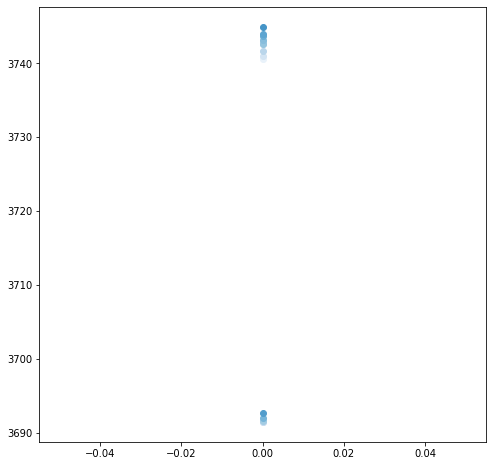

In [32]:
import numpy as np
from matplotlib import cm

tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))

for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@lemmatized']
    plt.plot(score, 'o-', color=cm.Blues(colors[i]))

plt.show()

In [ ]:
import csv
import os

def data_process(data,):
    data = pd.DataFrame(data,columns=['text'])

    data['id'] = data.index
    data.index.name = 'id'

    lemmatized_text = []

    for text in tqdm(data['text'].values):
        lemmatized_text.append(text.split())

    data['lemmatized'] = lemmatized_text

    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_documents(data['lemmatized'])

    set_dict = set(finder.nbest(bigram_measures.pmi,31000)[100:])
    documents = data['lemmatized']
    bigrams = []

    for doc in documents:
        entry = ['_'.join([word_first, word_second])
                for word_first, word_second in zip(doc[:-1],doc[1:])
                if (word_first, word_second) in set_dict]
        bigrams.append(entry)

    data['bigram'] = bigrams
    vw_text = []

    for index, d in data.iterrows():
        vw_string = ''    
        doc_id = 'data_id_'+str(d.id)
        lemmatized = '@lemmatized ' + vowpalize_sequence(d.lemmatized)
        bigram = '@bigram ' + vowpalize_sequence(d.bigram)
        vw_string = ' |'.join([doc_id, lemmatized, bigram])
        vw_text.append(vw_string)

    data['vw_text'] = vw_text
    data = data.rename(columns={'text':'raw_text'})
    data = data.astype('str')
    folder = '/content/test'
    if not os.path.exists(folder):
        os.makedirs(folder)
    data['vw_text'].to_csv(os.path.join(folder,'vw.txt'),sep='\n', index=False, header=False, quoting = csv.QUOTE_NONE, quotechar='')

def ARTM_eval(model, data):
    data_process(data)
    test_batch_vectorizer = artm.BatchVectorizer(data_path='/content/test/vw.txt',
                                          data_format='vowpal_wabbit',
                                          target_folder='/content/test/batches')

    test_theta_matrix = model.transform(batch_vectorizer=test_batch_vectorizer)
    return test_theta_matrix
  
ARTM_eval(best_model, X_test.drop(labels=['id']))

Calculate the quality scores for each model. Make a 
barplot to compare the quality.

In [35]:
coh_artm = best_model.score_tracker['TopTokensCoherenceScore'].average_coherence

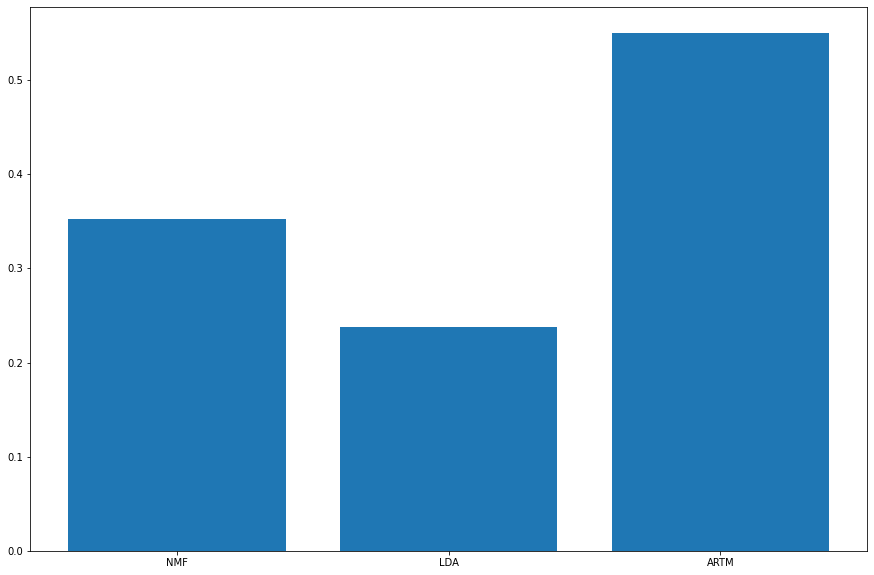

In [40]:
q_scores = [coherence(nmf,texts,dictionary).get_coherence(), coherence(lda,texts,dictionary).get_coherence(), coh_artm]
q_names = ['NMF', 'LDA', 'ARTM']
plt.figure(figsize=(15,10))
plt.bar(q_names,q_scores)
plt.ylabel = 'Coherence'
plt.show()